Pymaceuticals Inc.¶
Analysis
Add your analysis here
storytelling/truthtelling
notes on the subject: it is about treatment for skin cancer SCC

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [80]:
# Checking the number of mice
num_mice = merged_data['Mouse ID'].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [81]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

print("Outcome:", "array", duplicate_mice_ids)

Outcome: array ['g989']


In [82]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice_ids)]


duplicate_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_data.drop_duplicates(subset=['Mouse ID'])

# Displaying the clean DataFrame
print("Clean DataFrame without duplicate mice:")

clean_data.head()


Clean DataFrame without duplicate mice:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Checking the number of mice in the clean DataFrame
num_mice_clean = clean_data['Mouse ID'].shape[0]
print("Number of mice in the clean DataFrame:", num_mice_clean)

Number of mice in the clean DataFrame: 249


Generate summary statistics

In [85]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = merged_data.groupby('Drug Regimen')

In [86]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


In [87]:
# Assemble the resulting series into a single summary DataFrame.
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']
summary_stats.head()

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [88]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean', Median='median', Variance='var', Std_Dev='std', SEM='sem'
)
# Rename the columns
summary_stats.rename(columns={'Mean':'mean', 'Median':'median','Variance': 'var', 'Std_Dev': 'std', 'SEM': 'sem'}, inplace=True)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats.head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


Create bar charts and pie charts

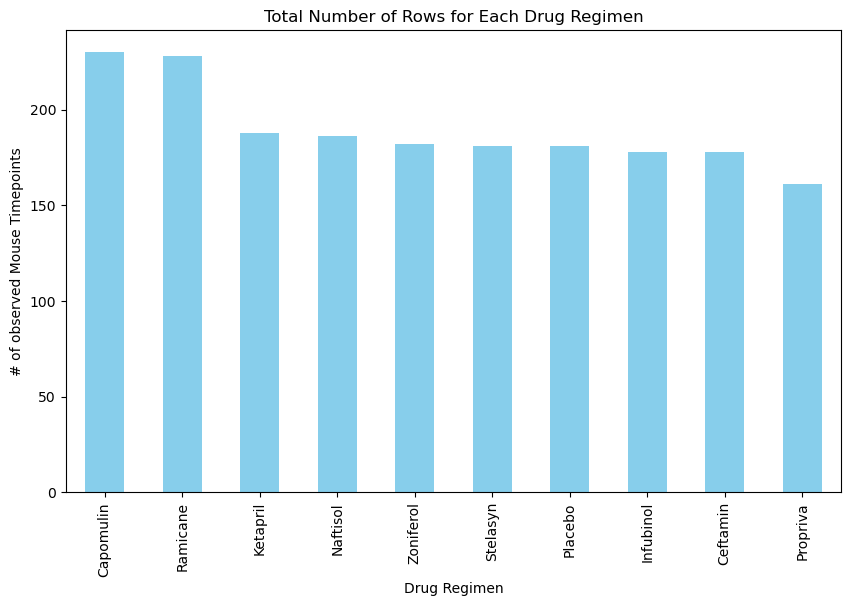

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merged_data['Drug Regimen'].value_counts()

# Plot the data as a bar plot using DataFrame.plot()
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=1)

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')


plt.show()


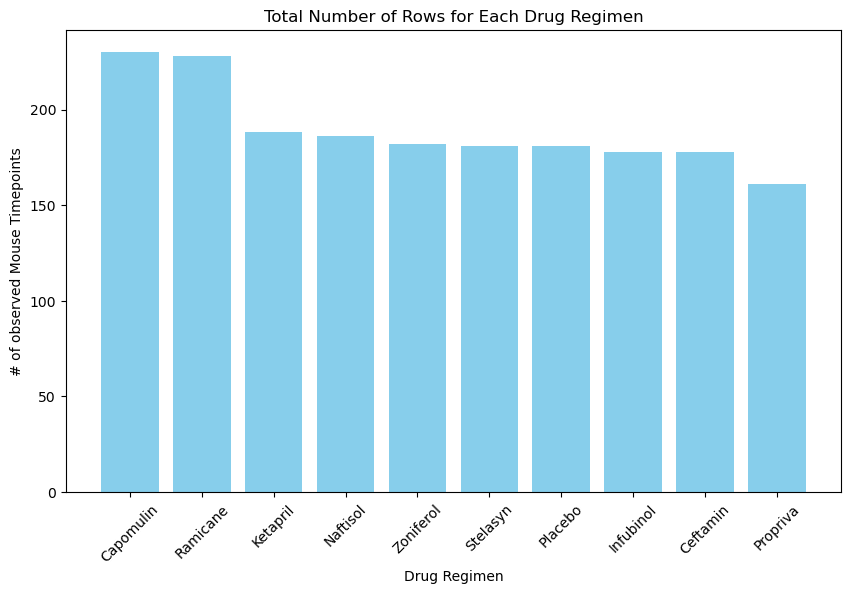

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = merged_data['Drug Regimen'].value_counts()

regimens = regimen_counts.index
counts = regimen_counts.values

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue', alpha=1)

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')


plt.xticks(rotation=45)


plt.show()


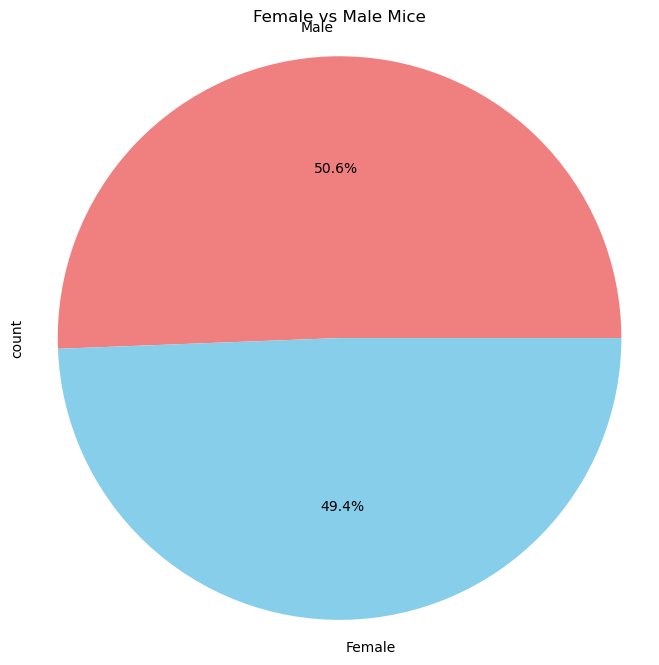

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = merged_data['Sex'].value_counts()

# Plot the data as a pie chart using DataFrame.plot()
sex_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])

# Add title
plt.title('Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')


plt.show()


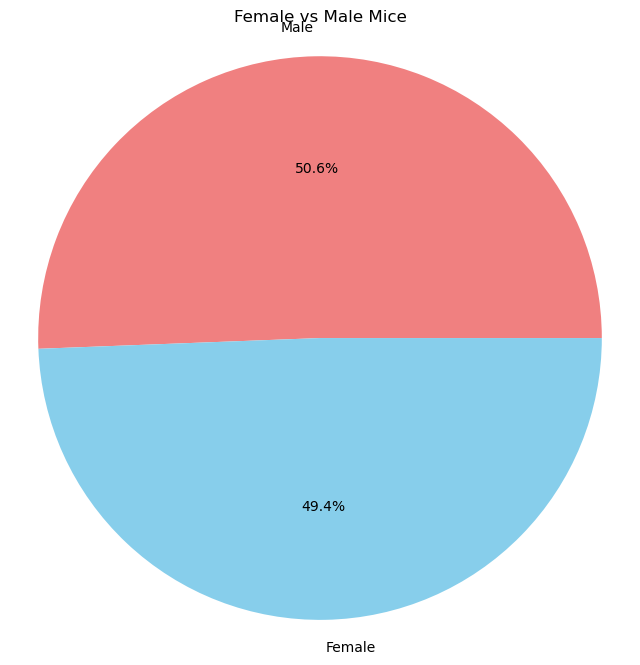

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = merged_data['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])


plt.title('Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')


plt.show()

Calculate quartiles, find outliers, and create a box plot

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, merged_data, on=['Mouse ID', 'Timepoint'], how='inner')

In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"{treatment}'s potential outliers:")
    print(potential_outliers)



Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


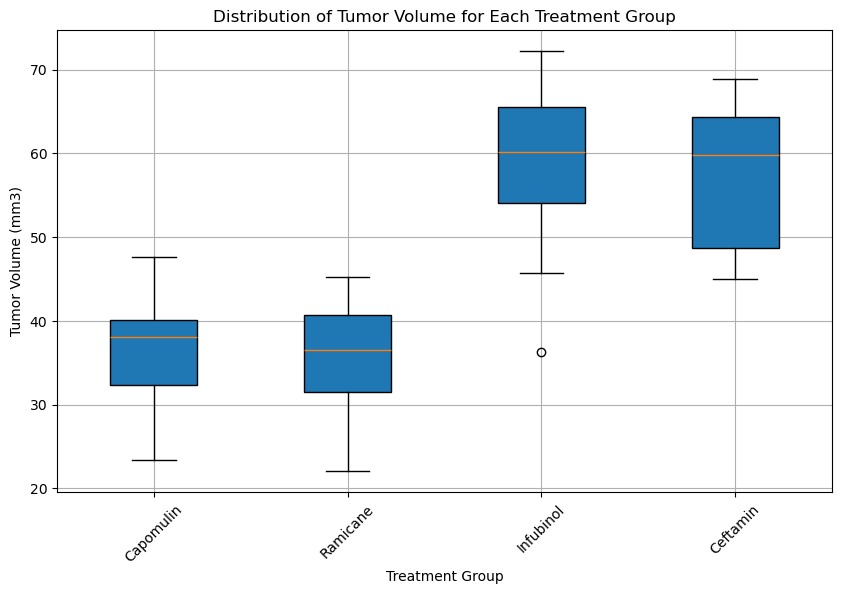

In [95]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True)

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Create a line plot and scatter plot

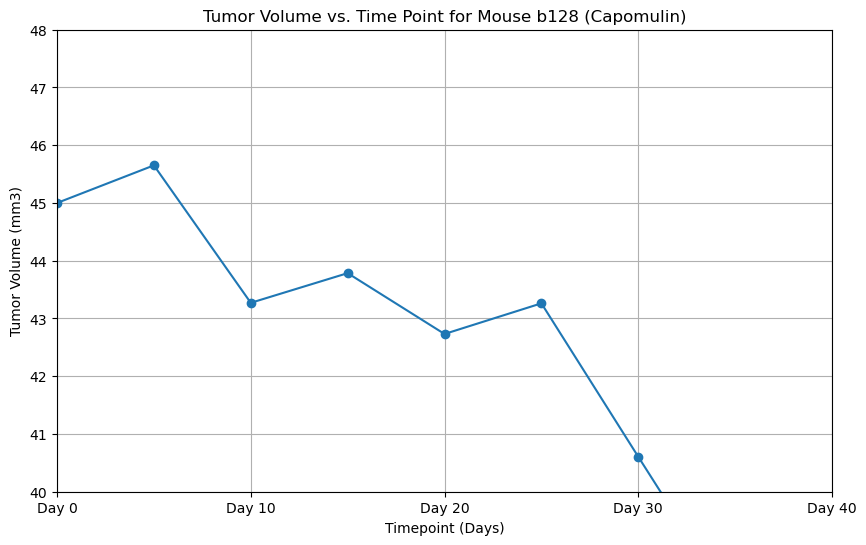

In [96]:
# Filter the data to include only the mice treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse from the filtered data (e.g., the first mouse in the dataset)
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter the tumor volume data for the chosen mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point for the chosen mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the limits for both axes
plt.xlim(0, 40)  
plt.ylim(40, 48)

# Set x-axis tick marks to count by intervals of 10
plt.xticks(range(0, 41, 10), [f'Day {day}' for day in range(0, 41, 10)])

# Show the plot
plt.grid(True)
plt.show()


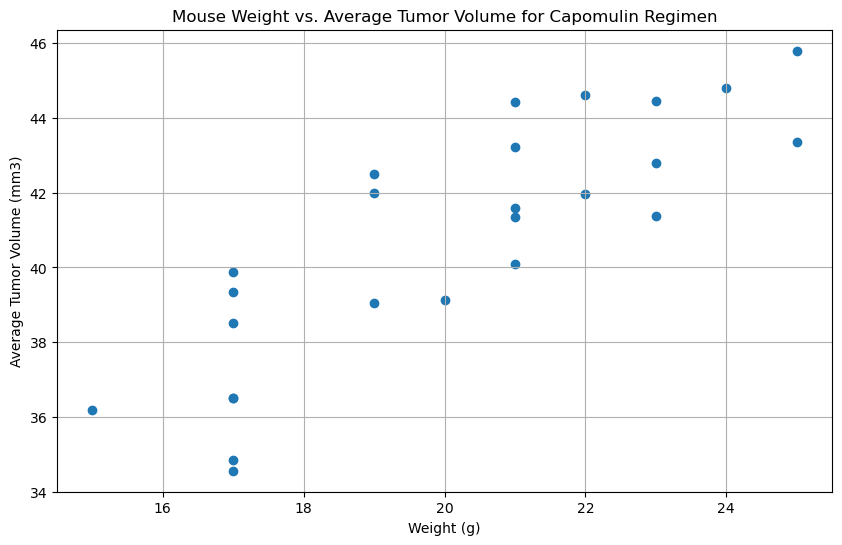

In [97]:
# Group the Capomulin data by mouse ID to calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the mouse metadata to obtain the weight of each mouse
capomulin_avg_tumor_volume = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()


Calculate correlation and regression

Correlation Coefficient: 0.84


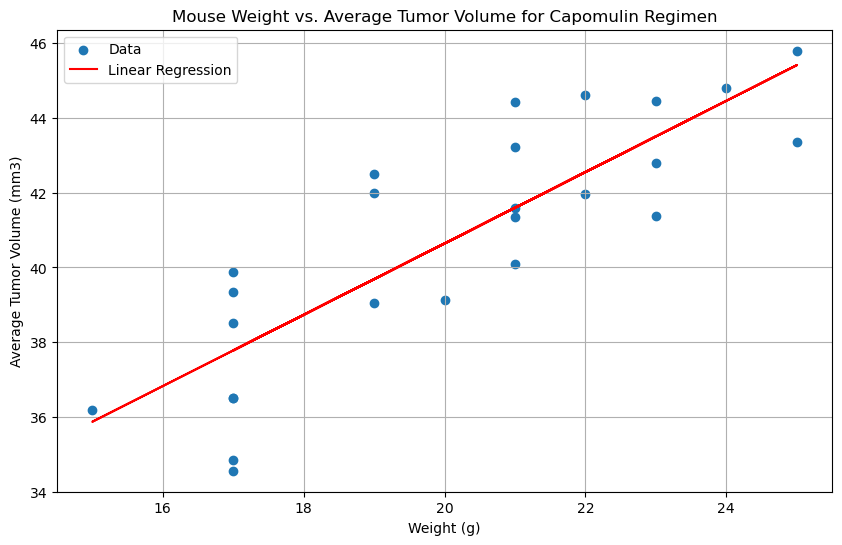

In [103]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = capomulin_avg_tumor_volume['Weight (g)'].corr(capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Round the correlation coefficient to the hundredths place
rounded_correlation_coefficient = round(correlation_coefficient, 2)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Print the rounded correlation coefficient
print(f'Correlation Coefficient: {rounded_correlation_coefficient}')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], marker='o', label='Data')

# Plot the linear regression line
plt.plot(capomulin_avg_tumor_volume['Weight (g)'], slope * capomulin_avg_tumor_volume['Weight (g)'] + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
